# Lead Scoring Case Study

####        Using Logistic Regression Model

## Step 1: Importing Libraries and Data

In [643]:
# Improting necessary libraries

import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

import warnings
warnings.filterwarnings('ignore')

In [644]:
# Loading data from csv file

lead_1 = pd.read_csv('Leads.csv')
lead_1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Step 2: Inspecting the Dataframe

In [645]:
# Checking shape of dataframe

lead_1.shape

(9240, 37)

In [646]:
# Evaluating dataframe

lead_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [647]:
# Statistical overview of numerical columns

lead_1.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Step 3: Data Preparation

In [648]:
# Replacement of default "Select" value with "Null"

lead_1 = lead_1.replace('Select', np.nan)

In [649]:
# Determining percentage missing values in each column

100*lead_1.isnull().sum()/lead_1.shape[0]

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [650]:
# Dropping columns with more than 35% missing values

lead_1.drop(['Specialization', 'How did you hear about X Education', 'Tags', 'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis=1, inplace=True)

In [651]:
lead_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [652]:
# Checking data distribution of the categorical column

lead_1.value_counts(['Lead Origin'])

Lead Origin            
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
dtype: int64

In [653]:
# Replacing skewness in "Lead Origin" column with "Other_Origin" value

lead_1['Lead Origin'] = lead_1['Lead Origin'].replace(['Lead Add Form','Lead Import', 'Quick Add Form'] , 'Other_Origin')

In [654]:
lead_1.value_counts(['Lead Origin'])

Lead Origin            
Landing Page Submission    4886
API                        3580
Other_Origin                774
dtype: int64

In [655]:
# Imputation of missing values with highest occuring value

lead_1['Lead Source'].fillna('Google', inplace=True)

In [656]:
lead_1.value_counts(['Lead Source'])

Lead Source      
Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
Pay per Click Ads       1
welearnblog_Home        1
NC_EDM                  1
WeLearn                 1
blog                    1
testone                 1
youtubechannel          1
dtype: int64

In [657]:
# Correction of "Google" value

lead_1['Lead Source'] = lead_1['Lead Source'].replace('google', 'Google')

In [658]:
# Replacing skewness in "Lead Source" column with "Social_Media" value

lead_1['Lead Source'] = lead_1['Lead Source'].replace(['Facebook', 'bing', 'Click2call', 'Press_Release', 'Social Media', 'Live Chat', 'Pay per Click Ads','welearnblog_Home', 'NC_EDM', 'WeLearn', 'blog', 'testone', 'youtubechannel'], 'Social_Media')

In [659]:
lead_1.value_counts('Lead Source')

Lead Source
Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Social_Media          78
dtype: int64

In [660]:
# Checking data distribution of the categorical column

lead_1.value_counts('Do Not Email')

Do Not Email
No     8506
Yes     734
dtype: int64

In [661]:
# Checking data distribution of the categorical column

lead_1.value_counts('Do Not Call')

Do Not Call
No     9238
Yes       2
dtype: int64

In [662]:
# Dropping column 'Do Not Call' due high skewness of values

lead_1.drop(['Do Not Call'], axis=1, inplace=True)

In [663]:
# Checking data distribution of the categorical column

lead_1.value_counts('TotalVisits')

TotalVisits
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
26.0        2
28.0        2
43.0        1
115.0       1
74.0        1
55.0        1
54.0        1
141.0       1
42.0        1
41.0        1
32.0        1
30.0        1
251.0       1
dtype: int64

In [664]:
# Determining the median value of "TotalVisits" column

lead_1.TotalVisits.median()

3.0

In [665]:
# Imputation of missing values with median value

lead_1.TotalVisits.fillna(3.0, inplace=True)

In [666]:
# Converting data type from float to integer

lead_1.TotalVisits = lead_1.TotalVisits.astype(int)
lead_1.TotalVisits.dtypes

dtype('int32')

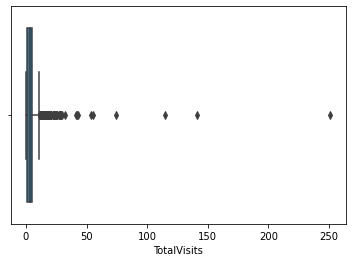

In [667]:
# Visualization of data distribution in "TotalVisits" column

sns.boxplot('TotalVisits', data=lead_1);

In [668]:
# Replacing outlier values of more than 28 with median value

lead_1['TotalVisits'] = np.where(lead_1['TotalVisits'] >28, 3, lead_1['TotalVisits'])

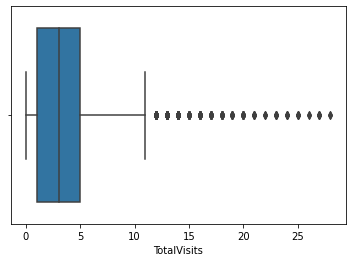

In [669]:
sns.boxplot('TotalVisits', data=lead_1);

In [670]:
# Checking data distribution in numerical column

lead_1.value_counts('Total Time Spent on Website')

Total Time Spent on Website
0      2193
60       19
127      18
74       18
75       18
       ... 
919       1
915       1
911       1
909       1
934       1
Length: 1731, dtype: int64

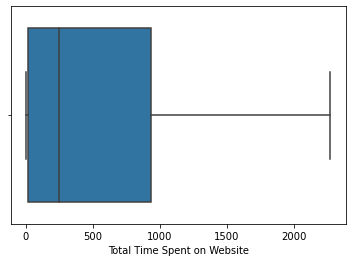

In [671]:
# Visualization of data distribution in "Total Time Spent on Website" column

sns.boxplot('Total Time Spent on Website', data=lead_1);

In [672]:
# Checking data distribution in numerical column

lead_1.value_counts('Page Views Per Visit')

Page Views Per Visit
0.00     2189
2.00     1795
3.00     1196
4.00      896
1.00      651
         ... 
1.86        1
3.80        1
3.82        1
3.83        1
55.00       1
Length: 114, dtype: int64

In [673]:
# Determining median value of "Page Views Per Visit" column

lead_1['Page Views Per Visit'].median()

2.0

In [674]:
# Imputation of missing values with median value

lead_1['Page Views Per Visit'].fillna(2.0, inplace=True)

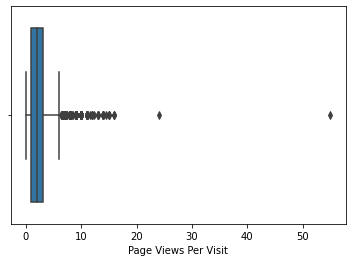

In [675]:
# Visualizing the data distribution of "Page Views Per Visit" column

sns.boxplot('Page Views Per Visit', data=lead_1);

In [676]:
# Replacing outlier values of more than 20 with median value

lead_1['Page Views Per Visit'] = np.where(lead_1['Page Views Per Visit'] >20, 2.0, lead_1['Page Views Per Visit'])

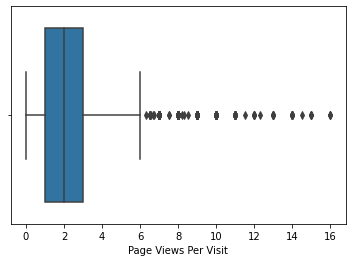

In [677]:
sns.boxplot('Page Views Per Visit', data=lead_1);

In [678]:
# Checking data distribution of the categorical column

lead_1.value_counts('Last Activity')

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
dtype: int64

In [679]:
# Merging groups with less number of values into a new group "Other_activities" 

lead_1['Last Activity'] = lead_1['Last Activity'].replace(['Had a Phone Conversation', 'Approached upfront', 'View in browser link Clicked', 'Email Marked Spam', 'Email Received', 'Resubscribed to emails', 'Visited Booth in Tradeshow'], 'Other_activities')

In [680]:
lead_1.value_counts('Last Activity')

Last Activity
Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    93
Unsubscribed                   61
Other_activities               51
dtype: int64

In [681]:
# Imputing missing values with highest occuring value

lead_1['Last Activity'].fillna('Email Opened', inplace=True)

In [682]:
# Checking data distribution of the categorical column

lead_1.value_counts('Country')

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Kuwait                     4
Sweden                     3
Belgium                    2
Bangladesh                 2
China                      2
Ghana                      2
Asia/Pacific Region        2
Italy                      2
Netherlands                2
Philippines                2
Uganda                     2
Indonesia                  1
Kenya                      1
Liberia                    1
Vietnam                    1
Denmark                    1
Russia                     1
Sri La

In [683]:
# Merging groups with less number of values into a new group "Other_country" 

lead_1['Country'] = lead_1['Country'].replace(['United States', 'United Arab Emirates', 'Singapore', 'Saudi Arabia', 'United Kingdom', 'Australia', 'Qatar', 'Hong Kong', 'Bahrain', 'Oman', 'France', 'unknown', 'South Africa', 'Canada', 'Nigeria', 'Germany', 'Kuwait', 'Sweden', 'Belgium', 'Bangladesh', 'China', 'Ghana', 'Asia/Pacific Region', 'Italy', 'Netherlands', 'Philippines', 'Uganda', 'Indonesia', 'Kenya', 'Liberia', 'Vietnam', 'Denmark', 'Russia', 'Sri Lanka', 'Switzerland', 'Tanzania', 'Malaysia'], 'Other_country')

In [684]:
# Imputing missing values with highest occuring value

lead_1.Country.fillna('India', inplace=True)

In [685]:
lead_1.value_counts('Country')

Country
India            8953
Other_country     287
dtype: int64

In [686]:
# Checking data distribution of the categorical column

lead_1.value_counts('What is your current occupation')

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
dtype: int64

In [687]:
# Merging groups with less number of values into a new group "Other" 

lead_1['What is your current occupation'] = lead_1['What is your current occupation'].replace(['Other', 'Housewife', 'Businessman'], 'Other')

In [688]:
# Imputing missing values with highest occuring value

lead_1['What is your current occupation'].fillna('Unemployed', inplace=True)

In [689]:
lead_1.value_counts('What is your current occupation')

What is your current occupation
Unemployed              8290
Working Professional     706
Student                  210
Other                     34
dtype: int64

In [690]:
# Checking data distribution of the categorical column

lead_1.value_counts('What matters most to you in choosing a course')

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
dtype: int64

In [691]:
# Dropping the column with highly skewed data distribution

lead_1.drop(['What matters most to you in choosing a course'], axis= 1, inplace=True)

In [692]:
# Checking data distribution of the categorical column

lead_1.value_counts('Search')

Search
No     9226
Yes      14
dtype: int64

In [693]:
# Dropping the column with highly skewed data distribution

lead_1.drop(['Search'], axis= 1, inplace=True)

In [694]:
# Checking data distribution of the categorical column

lead_1.value_counts('Magazine')

Magazine
No    9240
dtype: int64

In [695]:
# Dropping the column with a single value

lead_1.drop(['Magazine'], axis=1, inplace=True)

In [696]:
# Checking data distribution of the categorical column

lead_1.value_counts('Newspaper Article')

Newspaper Article
No     9238
Yes       2
dtype: int64

In [697]:
# Dropping the column with highly skewed data distribution

lead_1.drop(['Newspaper Article'], axis=1, inplace=True)

In [698]:
# Checking data distribution of the categorical column

lead_1.value_counts('X Education Forums')

X Education Forums
No     9239
Yes       1
dtype: int64

In [699]:
# Dropping the column with highly skewed data distribution

lead_1.drop(['X Education Forums'], axis=1, inplace=True)

In [700]:
# Checking data distribution of the categorical column

lead_1.value_counts('Newspaper')

Newspaper
No     9239
Yes       1
dtype: int64

In [701]:
# Dropping the column with highly skewed data distribution

lead_1.drop(['Newspaper'], axis=1, inplace=True)

In [702]:
# Checking data distribution of the categorical column

lead_1.value_counts('Digital Advertisement')

Digital Advertisement
No     9236
Yes       4
dtype: int64

In [703]:
# Dropping the column with highly skewed data distribution

lead_1.drop(['Digital Advertisement'], axis=1, inplace=True)

In [704]:
# Checking data distribution of the categorical column

lead_1.value_counts('Through Recommendations')

Through Recommendations
No     9233
Yes       7
dtype: int64

In [705]:
# Dropping the column with highly skewed data distribution

lead_1.drop(['Through Recommendations'], axis=1, inplace=True)

In [706]:
# Checking data distribution of the categorical column

lead_1.value_counts('Receive More Updates About Our Courses')

Receive More Updates About Our Courses
No    9240
dtype: int64

In [707]:
# Dropping the column with a single value

lead_1.drop(['Receive More Updates About Our Courses'], axis=1, inplace=True)

In [708]:
# Checking data distribution of the categorical column

lead_1.value_counts('Update me on Supply Chain Content')

Update me on Supply Chain Content
No    9240
dtype: int64

In [709]:
# Dropping the column with a single value

lead_1.drop(['Update me on Supply Chain Content'], axis=1, inplace=True)

In [710]:
# Checking data distribution of the categorical column

lead_1.value_counts('Get updates on DM Content')

Get updates on DM Content
No    9240
dtype: int64

In [711]:
# Dropping the column with a single value

lead_1.drop(['Get updates on DM Content'], axis=1, inplace=True)

In [712]:
# Dropping the columns that were acquired by sales team - Columns with no significance

lead_1.drop(['I agree to pay the amount through cheque', 'Last Notable Activity'], axis=1, inplace=True)

In [713]:
# Checking data distribution of the categorical column

lead_1.value_counts('A free copy of Mastering The Interview')

A free copy of Mastering The Interview
No     6352
Yes    2888
dtype: int64

In [714]:
# Inspecting final dataframe

lead_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9240 non-null   object 
 4   Do Not Email                            9240 non-null   object 
 5   Converted                               9240 non-null   int64  
 6   TotalVisits                             9240 non-null   int32  
 7   Total Time Spent on Website             9240 non-null   int64  
 8   Page Views Per Visit                    9240 non-null   float64
 9   Last Activity                           9240 non-null   object 
 10  Country                                 9240 non-null   obje

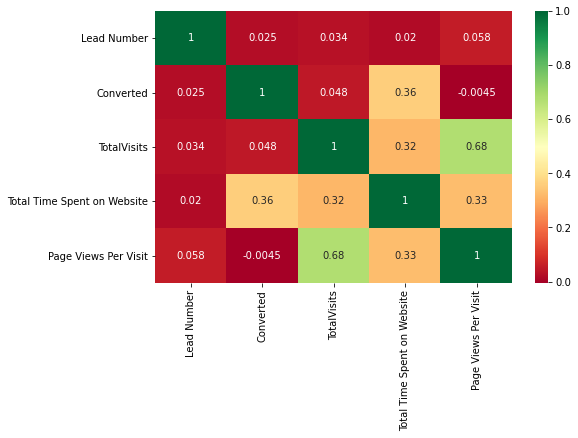

In [715]:
# Visualizing correlations between numirical columns

plt.figure(figsize = (8, 5))
sns.heatmap(lead_1.corr(), annot = True, cmap="RdYlGn");

Columns "TotalVisits" and "Page Views Per Visit" seems to be slighly correlated each other.

In [716]:
# Creating dummy variables for categorical columns

dm1 = pd.get_dummies(lead_1['Lead Origin'], prefix='Lead_origin')
dm1.drop(['Lead_origin_Other_Origin'], axis=1, inplace=True)
dm1.head()

,Lead_origin_API,Lead_origin_Landing Page Submission
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1


In [717]:
dm2 = pd.get_dummies(lead_1['Lead Source'], prefix='Lead_source')
dm2.drop(['Lead_source_Social_Media'], axis=1, inplace=True)
dm2.head()

,Lead_source_Direct Traffic,Lead_source_Google,Lead_source_Olark Chat,Lead_source_Organic Search,Lead_source_Reference,Lead_source_Referral Sites,Lead_source_Welingak Website
0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0


In [718]:
dm3 = pd.get_dummies(lead_1['Do Not Email'], prefix='Not_Email')
dm3.drop(['Not_Email_Yes'], axis=1, inplace=True)
dm3.head()

,Not_Email_No
0,1
1,1
2,1
3,1
4,1


In [719]:
dm4 = pd.get_dummies(lead_1['Last Activity'], prefix='Last_Activity')
dm4.drop(['Last_Activity_Other_activities'], axis=1, inplace=True)
dm4.head()

,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed
0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0


In [720]:
dm5 = pd.get_dummies(lead_1['Country'], prefix='Country')
dm5.drop(['Country_Other_country'], axis=1, inplace=True)
dm5.head()

,Country_India
0,1
1,1
2,1
3,1
4,1


In [721]:
dm6 = pd.get_dummies(lead_1['What is your current occupation'], prefix='Occupation')
dm6.drop(['Occupation_Other'], axis=1, inplace=True)
dm6.head()

,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
0,0,1,0
1,0,1,0
2,1,0,0
3,0,1,0
4,0,1,0


In [722]:
dm7 = pd.get_dummies(lead_1['A free copy of Mastering The Interview'], prefix='Free_copy')
dm7.drop(['Free_copy_Yes'], axis=1, inplace=True)
dm7.head()

,Free_copy_No
0,1
1,1
2,0
3,1
4,1


In [723]:
# Concatinating all dataframes with the master dataframe

lead_1 = pd.concat([lead_1,dm1], axis=1)
lead_1 = pd.concat([lead_1,dm2], axis=1)
lead_1 = pd.concat([lead_1,dm3], axis=1)
lead_1 = pd.concat([lead_1,dm4], axis=1)
lead_1 = pd.concat([lead_1,dm5], axis=1)
lead_1 = pd.concat([lead_1,dm6], axis=1)
lead_1 = pd.concat([lead_1,dm7], axis=1)
lead_1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Country_India,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Free_copy_No
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0,0,0.0,Page Visited on Website,...,0,1,0,0,0,1,0,1,0,1
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5,674,2.5,Email Opened,...,0,0,0,0,0,1,0,1,0,1
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2,1532,2.0,Email Opened,...,0,0,0,0,0,1,1,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1,305,1.0,Unreachable,...,0,0,0,1,0,1,0,1,0,1
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2,1428,1.0,Converted to Lead,...,0,0,0,0,0,1,0,1,0,1


In [724]:
# Dropping the original columns

lead_2 = lead_1.drop(['Prospect ID', 'Lead Origin', 'Lead Number', 'Lead Source', 'Do Not Email', 'Last Activity', 'Country', 'What is your current occupation', 'A free copy of Mastering The Interview', 'Converted'], axis=1)

In [725]:
lead_2.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead_origin_API,Lead_origin_Landing Page Submission,Lead_source_Direct Traffic,Lead_source_Google,Lead_source_Olark Chat,Lead_source_Organic Search,Lead_source_Reference,...,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Country_India,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Free_copy_No
0,0,0,0.0,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,1
1,5,674,2.5,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1
2,2,1532,2.0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,1,305,1.0,0,1,1,0,0,0,0,...,0,0,0,1,0,1,0,1,0,1
4,2,1428,1.0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1


In [726]:
# Putting target variable to y

y = lead_1['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [727]:
# Putting feature variables to X

X = lead_2

## Step 4: Test-Train Split

In [728]:
# Splitting the dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Step 5: Feature Scaling

In [729]:
# Scaling the numerical variables

scaler = StandardScaler()
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [730]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead_origin_API,Lead_origin_Landing Page Submission,Lead_source_Direct Traffic,Lead_source_Google,Lead_source_Olark Chat,Lead_source_Organic Search,Lead_source_Reference,...,Last_Activity_Olark Chat Conversation,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Last_Activity_Unreachable,Last_Activity_Unsubscribed,Country_India,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Free_copy_No
1871,-0.982848,-0.885371,-1.143134,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
6795,0.191775,0.005716,-0.492331,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3516,0.485431,-0.691418,0.080180,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
8105,0.485431,1.365219,1.303493,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,1,0,1
3934,-0.982848,-0.885371,-1.143134,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


## Step 6: Feature Selection Using RFE

In [731]:
# Feature selection using RFE

logreg = LogisticRegression()
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [732]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 6),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 7),
 ('Lead_origin_API', True, 1),
 ('Lead_origin_Landing Page Submission', True, 1),
 ('Lead_source_Direct Traffic', False, 14),
 ('Lead_source_Google', False, 5),
 ('Lead_source_Olark Chat', True, 1),
 ('Lead_source_Organic Search', False, 10),
 ('Lead_source_Reference', True, 1),
 ('Lead_source_Referral Sites', False, 12),
 ('Lead_source_Welingak Website', True, 1),
 ('Not_Email_No', True, 1),
 ('Last_Activity_Converted to Lead', True, 1),
 ('Last_Activity_Email Bounced', True, 1),
 ('Last_Activity_Email Link Clicked', False, 2),
 ('Last_Activity_Email Opened', False, 8),
 ('Last_Activity_Form Submitted on Website', True, 1),
 ('Last_Activity_Olark Chat Conversation', True, 1),
 ('Last_Activity_Page Visited on Website', False, 3),
 ('Last_Activity_SMS Sent', True, 1),
 ('Last_Activity_Unreachable', False, 9),
 ('Last_Activity_Unsubscribed', False, 4),
 ('Country_India', False, 11)

In [733]:
col = list(X_train.columns[rfe.support_])

In [734]:
# Features discarded after RFE

X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead_source_Direct Traffic',
       'Lead_source_Google', 'Lead_source_Organic Search',
       'Lead_source_Referral Sites', 'Last_Activity_Email Link Clicked',
       'Last_Activity_Email Opened', 'Last_Activity_Page Visited on Website',
       'Last_Activity_Unreachable', 'Last_Activity_Unsubscribed',
       'Country_India', 'Free_copy_No'],
      dtype='object')

## Step 7: Model Building

In [735]:
# Evaluation of Model # 1

X_train_sm = sm.add_constant(X_train[col])
model1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = model1.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2766.0
Date:                Sun, 16 May 2021   Deviance:                       5532.0
Time:                        20:38:32   Pearson chi2:                 7.48e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [736]:
# Verifying VIF of selected columns

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Occupation_Unemployed,75.65
2,Lead_origin_Landing Page Submission,39.89
1,Lead_origin_API,30.55
6,Not_Email_No,20.55
14,Occupation_Working Professional,7.64
4,Lead_source_Reference,5.43
12,Occupation_Student,2.76
3,Lead_source_Olark Chat,2.38
5,Lead_source_Welingak Website,2.04
8,Last_Activity_Email Bounced,1.74


In [737]:
# Removing column with p value > 0.05

col.remove('Occupation_Student')
col

['Total Time Spent on Website',
 'Lead_origin_API',
 'Lead_origin_Landing Page Submission',
 'Lead_source_Olark Chat',
 'Lead_source_Reference',
 'Lead_source_Welingak Website',
 'Not_Email_No',
 'Last_Activity_Converted to Lead',
 'Last_Activity_Email Bounced',
 'Last_Activity_Form Submitted on Website',
 'Last_Activity_Olark Chat Conversation',
 'Last_Activity_SMS Sent',
 'Occupation_Unemployed',
 'Occupation_Working Professional']

In [738]:
# Evaluation of Model # 2

X_train_sm = sm.add_constant(X_train[col])
model2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = model2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2766.9
Date:                Sun, 16 May 2021   Deviance:                       5533.9
Time:                        20:38:33   Pearson chi2:                 7.48e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [739]:
# Verifying VIF of selected columns

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Occupation_Unemployed,28.19
2,Lead_origin_Landing Page Submission,20.91
6,Not_Email_No,18.81
1,Lead_origin_API,17.02
13,Occupation_Working Professional,3.47
4,Lead_source_Reference,3.35
3,Lead_source_Olark Chat,2.38
8,Last_Activity_Email Bounced,1.65
11,Last_Activity_SMS Sent,1.63
5,Lead_source_Welingak Website,1.56


In [740]:
# Removing column with p value > 0.05

col.remove('Last_Activity_Form Submitted on Website')
col

['Total Time Spent on Website',
 'Lead_origin_API',
 'Lead_origin_Landing Page Submission',
 'Lead_source_Olark Chat',
 'Lead_source_Reference',
 'Lead_source_Welingak Website',
 'Not_Email_No',
 'Last_Activity_Converted to Lead',
 'Last_Activity_Email Bounced',
 'Last_Activity_Olark Chat Conversation',
 'Last_Activity_SMS Sent',
 'Occupation_Unemployed',
 'Occupation_Working Professional']

In [741]:
# Evaluation of Model # 3

X_train_sm = sm.add_constant(X_train[col])
model3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = model3.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2768.2
Date:                Sun, 16 May 2021   Deviance:                       5536.4
Time:                        20:38:33   Pearson chi2:                 7.47e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [742]:
# Verifying VIF of selected columns

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Occupation_Unemployed,28.19
2,Lead_origin_Landing Page Submission,20.88
6,Not_Email_No,18.81
1,Lead_origin_API,17.01
12,Occupation_Working Professional,3.47
4,Lead_source_Reference,3.35
3,Lead_source_Olark Chat,2.38
8,Last_Activity_Email Bounced,1.65
10,Last_Activity_SMS Sent,1.62
5,Lead_source_Welingak Website,1.56


In [743]:
# Removing column with VIF value > 5.00

col.remove('Occupation_Unemployed')
col

['Total Time Spent on Website',
 'Lead_origin_API',
 'Lead_origin_Landing Page Submission',
 'Lead_source_Olark Chat',
 'Lead_source_Reference',
 'Lead_source_Welingak Website',
 'Not_Email_No',
 'Last_Activity_Converted to Lead',
 'Last_Activity_Email Bounced',
 'Last_Activity_Olark Chat Conversation',
 'Last_Activity_SMS Sent',
 'Occupation_Working Professional']

In [744]:
# Evaluation of Model # 4

X_train_sm = sm.add_constant(X_train[col])
model4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = model4.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2771.5
Date:                Sun, 16 May 2021   Deviance:                       5542.9
Time:                        20:38:33   Pearson chi2:                 7.52e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [745]:
# Verifying VIF of selected columns

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Not_Email_No,17.88
2,Lead_origin_Landing Page Submission,10.46
1,Lead_origin_API,9.35
3,Lead_source_Olark Chat,2.38
4,Lead_source_Reference,2.30
8,Last_Activity_Email Bounced,1.62
10,Last_Activity_SMS Sent,1.60
9,Last_Activity_Olark Chat Conversation,1.46
5,Lead_source_Welingak Website,1.28
0,Total Time Spent on Website,1.25


In [746]:
# Removing column with VIF value > 5.00

col.remove('Not_Email_No')
col

['Total Time Spent on Website',
 'Lead_origin_API',
 'Lead_origin_Landing Page Submission',
 'Lead_source_Olark Chat',
 'Lead_source_Reference',
 'Lead_source_Welingak Website',
 'Last_Activity_Converted to Lead',
 'Last_Activity_Email Bounced',
 'Last_Activity_Olark Chat Conversation',
 'Last_Activity_SMS Sent',
 'Occupation_Working Professional']

In [747]:
# Evaluation of Model # 5

X_train_sm = sm.add_constant(X_train[col])
model5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = model5.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2790.7
Date:                Sun, 16 May 2021   Deviance:                       5581.4
Time:                        20:38:33   Pearson chi2:                 7.58e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [748]:
# Verifying VIF of selected columns

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead_origin_API,2.38
3,Lead_source_Olark Chat,2.38
9,Last_Activity_SMS Sent,1.60
2,Lead_origin_Landing Page Submission,1.53
8,Last_Activity_Olark Chat Conversation,1.46
0,Total Time Spent on Website,1.24
4,Lead_source_Reference,1.18
10,Occupation_Working Professional,1.18
6,Last_Activity_Converted to Lead,1.11
7,Last_Activity_Email Bounced,1.07


In [749]:
# Making prediction with final model

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.230309
6795    0.183612
3516    0.269779
8105    0.760494
3934    0.230309
4844    0.989550
3297    0.091821
8071    0.992126
987     0.144283
7423    0.892907
dtype: float64

In [750]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.23030943, 0.18361215, 0.26977932, 0.76049366, 0.23030943,
       0.98954975, 0.09182123, 0.9921257 , 0.14428302, 0.89290656])

In [751]:
# Creating dataframe with predicted values, probabilities and Lead numbers

y_train_pred_final = pd.DataFrame({'Conversion':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Conversion,Conversion_Prob,Lead Number
0,0,0.230309,1871
1,0,0.183612,6795
2,0,0.269779,3516
3,0,0.760494,8105
4,0,0.230309,3934


In [752]:
# Creating columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Conversion,Conversion_Prob,Lead Number,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.230309,1871,1,1,1,0,0,0,0,0,0,0
1,0,0.183612,6795,1,1,0,0,0,0,0,0,0,0
2,0,0.269779,3516,1,1,1,0,0,0,0,0,0,0
3,0,0.760494,8105,1,1,1,1,1,1,1,1,0,0
4,0,0.230309,3934,1,1,1,0,0,0,0,0,0,0


In [753]:
# Calculating accuracy, sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final[i] )
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] = [i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.381262     1.000000     0.000000
0.1   0.1  0.575603     0.967153     0.334333
0.2   0.2  0.711967     0.921330     0.582959
0.3   0.3  0.792208     0.822790     0.773363
0.4   0.4  0.812307     0.757502     0.846077
0.5   0.5  0.799165     0.649230     0.891554
0.6   0.6  0.787570     0.571371     0.920790
0.7   0.7  0.772727     0.491079     0.946277
0.8   0.8  0.741342     0.367397     0.971764
0.9   0.9  0.709184     0.255069     0.989005


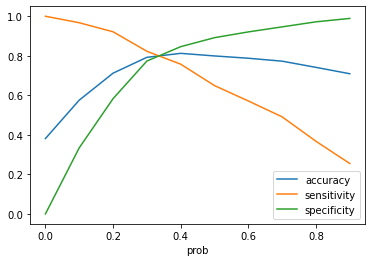

In [754]:
# Plotting accuracy, sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity']);

Optimum cutoff value is around 0.3 probability level.

In [755]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Conversion,Conversion_Prob,Lead Number,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.230309,1871,1,1,1,0,0,0,0,0,0,0,0
1,0,0.183612,6795,1,1,0,0,0,0,0,0,0,0,0
2,0,0.269779,3516,1,1,1,0,0,0,0,0,0,0,0
3,0,0.760494,8105,1,1,1,1,1,1,1,1,0,0,1
4,0,0.230309,3934,1,1,1,0,0,0,0,0,0,0,0


In [756]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Conversion, y_train_pred_final.predicted )
print(confusion)

[[3095  907]
 [ 437 2029]]


In [757]:
# Predicted     not_conv    conv
# Actual
# not_conv        3095      907
# conv            437       2029

In [758]:
# Accuracy value of the final model

print(metrics.accuracy_score(y_train_pred_final.Conversion, y_train_pred_final.predicted))

0.7922077922077922


In [759]:
# Recall value of the final model

print(metrics.recall_score(y_train_pred_final.Conversion, y_train_pred_final.predicted))

0.8227899432278994


## Step 8: Making predictions on the test set

In [760]:
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [761]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead_origin_API,Lead_origin_Landing Page Submission,Lead_source_Olark Chat,Lead_source_Reference,Lead_source_Welingak Website,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Olark Chat Conversation,Last_Activity_SMS Sent,Occupation_Working Professional
4269,0.964504,1,0,0,0,0,0,0,0,1,0
2376,-0.885371,0,0,0,1,0,0,0,0,1,0
7766,-0.777416,1,0,0,0,0,0,0,0,0,1
9199,-0.885371,1,0,1,0,0,0,0,1,0,0
4359,-0.885371,0,0,0,1,0,0,0,0,0,0


In [762]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [763]:
y_test_pred = res.predict(X_test_sm)

In [764]:
y_test_pred[:10]

4269    0.735540
2376    0.922262
7766    0.692970
9199    0.065780
4359    0.786470
9186    0.481572
1631    0.390334
8963    0.164580
8007    0.046529
5324    0.274338
dtype: float64

In [765]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [766]:
# Let's see the head
y_pred_1.head()

,0
4269,0.735540
2376,0.922262
7766,0.692970
9199,0.065780
4359,0.786470


In [767]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [768]:
# Putting Lead Number to index
y_test_df['Lead Number'] = y_test_df.index

In [769]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [770]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [771]:
y_pred_final.head()

,Converted,Lead Number,0
0,1,4269,0.735540
1,1,2376,0.922262
2,1,7766,0.692970
3,0,9199,0.065780
4,1,4359,0.786470


In [772]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [773]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead Number','Converted','Conversion_Prob'], axis=1)

In [774]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead Number,Converted,Conversion_Prob
0,4269,1,0.735540
1,2376,1,0.922262
2,7766,1,0.692970
3,9199,0,0.065780
4,4359,1,0.786470


In [775]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [776]:
y_pred_final.head()

,Lead Number,Converted,Conversion_Prob,final_predicted
0,4269,1,0.735540,1
1,2376,1,0.922262,1
2,7766,1,0.692970,1
3,9199,0,0.065780,0
4,4359,1,0.786470,1


In [777]:
y_pred_final['Lead Number'][y_pred_final['Lead Number'] == 4269]

0    4269
Name: Lead Number, dtype: int64

In [778]:
y_pred_final["Prospect ID"] = y_pred_final["Lead Number"]
for i in y_pred_final["Lead Number"]:
    y_pred_final['Lead Number'][y_pred_final['Lead Number'] == i] = lead_1.iloc[i][1]
    y_pred_final['Prospect ID'][y_pred_final['Prospect ID'] == i] = lead_1.iloc[i][0]      
y_pred_final.head()

,Lead Number,Converted,Conversion_Prob,final_predicted,Prospect ID
0,619003,1,0.735540,1,dd53b3eb-ae22-474c-b872-48b05bbe180b
1,636884,1,0.922262,1,7a960b03-466c-4e36-bf12-b755fc77a0b1
2,590281,1,0.692970,1,2bd5fd90-a8fe-413e-9b8a-28e8469c5a5c
3,579892,0,0.065780,0,6eb89ae5-d1e0-4c19-8661-8f9545e0e408
4,617929,1,0.786470,1,f7ed6c72-7d36-413c-b2e0-414213c4ceef


In [779]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7983405483405484

In [780]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1307,  370],
       [ 189,  906]], dtype=int64)

In [781]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [782]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8273972602739726

In [783]:
# Let us calculate specificity
TN / float(TN+FP)

0.7793679189028027

In [784]:
lead_1.iloc[4269][1]

619003

In [785]:
y_pred_final['Score'] = round(y_pred_final['Conversion_Prob'] * 100,0)

In [786]:
y_pred_final.head()

,Lead Number,Converted,Conversion_Prob,final_predicted,Prospect ID,Score
0,619003,1,0.735540,1,dd53b3eb-ae22-474c-b872-48b05bbe180b,74.0
1,636884,1,0.922262,1,7a960b03-466c-4e36-bf12-b755fc77a0b1,92.0
2,590281,1,0.692970,1,2bd5fd90-a8fe-413e-9b8a-28e8469c5a5c,69.0
3,579892,0,0.065780,0,6eb89ae5-d1e0-4c19-8661-8f9545e0e408,7.0
4,617929,1,0.786470,1,f7ed6c72-7d36-413c-b2e0-414213c4ceef,79.0


In [787]:
y_pred_final.head()

,Lead Number,Converted,Conversion_Prob,final_predicted,Prospect ID,Score
0,619003,1,0.735540,1,dd53b3eb-ae22-474c-b872-48b05bbe180b,74.0
1,636884,1,0.922262,1,7a960b03-466c-4e36-bf12-b755fc77a0b1,92.0
2,590281,1,0.692970,1,2bd5fd90-a8fe-413e-9b8a-28e8469c5a5c,69.0
3,579892,0,0.065780,0,6eb89ae5-d1e0-4c19-8661-8f9545e0e408,7.0
4,617929,1,0.786470,1,f7ed6c72-7d36-413c-b2e0-414213c4ceef,79.0


In [789]:
y_pred_final = y_pred_final[['Prospect ID','Lead Number','Converted','Conversion_Prob','final_predicted','Score']]
y_pred_final.head()

,Prospect ID,Lead Number,Converted,Conversion_Prob,final_predicted,Score
0,dd53b3eb-ae22-474c-b872-48b05bbe180b,619003,1,0.735540,1,74.0
1,7a960b03-466c-4e36-bf12-b755fc77a0b1,636884,1,0.922262,1,92.0
2,2bd5fd90-a8fe-413e-9b8a-28e8469c5a5c,590281,1,0.692970,1,69.0
3,6eb89ae5-d1e0-4c19-8661-8f9545e0e408,579892,0,0.065780,0,7.0
4,f7ed6c72-7d36-413c-b2e0-414213c4ceef,617929,1,0.786470,1,79.0
